In [1]:
# Package imports

import os
import numpy as np
import json
import torch
from torchvision import datasets as tv_dataset, models
from torchvision import transforms as tv_transforms
from torchvision.utils import make_grid
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch_helper as thelper
import plt_helper
import util_helper
import warnings
import train_model
warnings.filterwarnings('ignore')
colab_kernel = False

In [2]:
data_dir = "./assets/flower_data"
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')

In [3]:
if colab_kernel:    
    google_drive_mount = '/content/drive/'
    drive.mount(google_drive_mount)  # https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA
    proj_dir = google_drive_mount + 'My Drive/colab/pytorch-challenge'

In [4]:
# Creating transforms
normalize = ([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
crop = 224
resize = 256

augment = [tv_transforms.RandomRotation(30), tv_transforms.RandomHorizontalFlip(),
           tv_transforms.CenterCrop(224), tv_transforms.RandomVerticalFlip()]

transforms = {}
transforms['validation'] = thelper.Transforms.validation(resize=resize, crop=crop, normalize=normalize)
transforms['train'] = thelper.Transforms.train(augment=augment, normalize=normalize)

In [5]:
# Creating datasets
dataset = {}
dataset['train'] = thelper.Dataset.dataset(train_dir, transforms['train'])
dataset['validation'] = thelper.Dataset.dataset(valid_dir, transforms['validation'])

In [6]:
# Creating dataloaders
data_loader = {}
data_loader['train'] = thelper.Loaders.loader(dataset['train'])
data_loader['validation'] = thelper.Loaders.loader(dataset['validation'])

In [7]:
print(data_loader)

{'train': <torch.utils.data.dataloader.DataLoader object at 0x7f760cff0fd0>, 'validation': <torch.utils.data.dataloader.DataLoader object at 0x7f760cff0f60>}


In [8]:
# Label mapping
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
label_map=cat_to_name

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

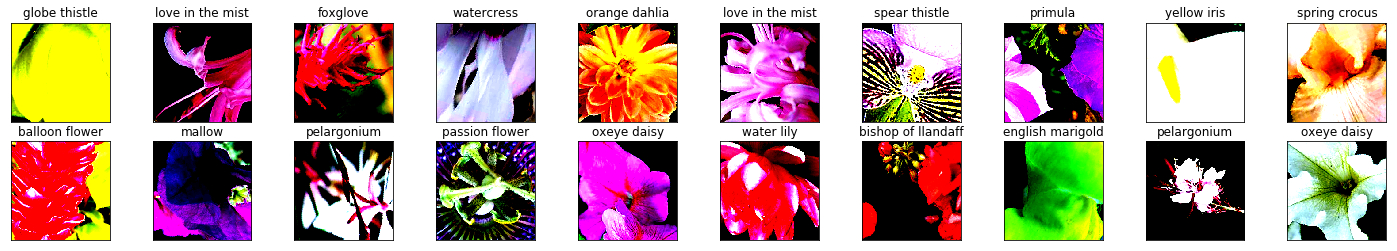

In [9]:
# Get a batch of training data
images, labels = next(iter(data_loader['train']))

# Get some images from batch
# images, labels = util_helper.rnd_classes(batch_images, classes_batch_images, label_map, k=4)

images = images.numpy() # convert images to numpy for display
labels = labels.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    # plt.imshow(np.transpose(images[idx], (1, 2, 0)).astype(np.uint8))
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(label_map[str(labels[idx])])


# # Make a grid from batch
# grid = make_grid(images)

# # Plot grid
# plt_helper.image_show(grid, title = [label[1] for label in labels])

In [10]:
# Create network
out_features = 102
# my_net = thelper.MyNet('resnet152', out_features=out_features)
my_net = thelper.MyNet('vgg16', out_features=out_features)

In [11]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.001
optimizer = my_net.create_optmizer()

In [12]:
# # Unfreeze the classifief.parameters
# for param in my_net.model.classifier.parameters():
#     param.requires_grad = True

In [13]:
# Create training object

# model, train_loader, validation_loader, criterion, optimizer, colab_kernel=False, epochs=3,
#              gpu_on=False, model_name = None):


train = train_model.TrainModel(my_net.model, data_loader['train'], data_loader['validation'], criterion, optimizer,   
                               model_name=my_net.trained_model )

In [14]:
train.train()

Step:  1 epoch:  0 training_loss:  4.640903472900391
Step:  2 epoch:  0 training_loss:  9.314055442810059
Step:  3 epoch:  0 training_loss:  13.971564769744873
Step:  4 epoch:  0 training_loss:  18.624952793121338
Step:  5 epoch:  0 training_loss:  23.316845893859863
Step:  6 epoch:  0 training_loss:  27.980195999145508
Step:  7 epoch:  0 training_loss:  32.58237648010254
Step:  8 epoch:  0 training_loss:  37.2383246421814
Step:  9 epoch:  0 training_loss:  41.87047815322876
Step:  10 epoch:  0 training_loss:  46.517478942871094
Step:  11 epoch:  0 training_loss:  51.12967348098755
Step:  12 epoch:  0 training_loss:  55.768856048583984
Step:  13 epoch:  0 training_loss:  60.37763738632202
Step:  14 epoch:  0 training_loss:  64.98691511154175
Step:  15 epoch:  0 training_loss:  69.55650281906128
Step:  16 epoch:  0 training_loss:  74.22995615005493
Step:  17 epoch:  0 training_loss:  78.8395619392395
Step:  18 epoch:  0 training_loss:  83.47837734222412
Step:  19 epoch:  0 training_loss

Step:  152 epoch:  0 training_loss:  700.462525844574
Step:  153 epoch:  0 training_loss:  705.0551648139954
Step:  154 epoch:  0 training_loss:  709.6591839790344
Step:  155 epoch:  0 training_loss:  714.227442741394
Step:  156 epoch:  0 training_loss:  718.7803230285645
Step:  157 epoch:  0 training_loss:  723.3809480667114
Step:  158 epoch:  0 training_loss:  728.0811924934387
Step:  159 epoch:  0 training_loss:  732.6635007858276
Step:  160 epoch:  0 training_loss:  737.2531127929688
Step:  161 epoch:  0 training_loss:  741.7610960006714
Step:  162 epoch:  0 training_loss:  746.3773245811462
Step:  163 epoch:  0 training_loss:  750.9665851593018
Step:  164 epoch:  0 training_loss:  755.482684135437
Step:  165 epoch:  0 training_loss:  760.0885863304138
Step:  166 epoch:  0 training_loss:  764.7058844566345
Step:  167 epoch:  0 training_loss:  769.287793636322
Step:  168 epoch:  0 training_loss:  773.896321773529
Step:  169 epoch:  0 training_loss:  778.4674215316772
Step:  170 epoc

Step:  301 epoch:  0 training_loss:  1379.854748725891
Step:  302 epoch:  0 training_loss:  1384.3748149871826
Step:  303 epoch:  0 training_loss:  1388.8947157859802
Step:  304 epoch:  0 training_loss:  1393.372235774994
Step:  305 epoch:  0 training_loss:  1397.933289051056
Step:  306 epoch:  0 training_loss:  1402.4387464523315
Step:  307 epoch:  0 training_loss:  1406.8455653190613
Step:  308 epoch:  0 training_loss:  1411.4344410896301
Step:  309 epoch:  0 training_loss:  1415.9351105690002
Step:  310 epoch:  0 training_loss:  1420.459722518921
Step:  311 epoch:  0 training_loss:  1425.0774660110474
Step:  312 epoch:  0 training_loss:  1429.6649136543274
Step:  313 epoch:  0 training_loss:  1434.157350063324
Step:  314 epoch:  0 training_loss:  1438.5896439552307
Step:  315 epoch:  0 training_loss:  1443.17551279068
Step:  316 epoch:  0 training_loss:  1447.6195330619812
Step:  317 epoch:  0 training_loss:  1452.1161847114563
Step:  318 epoch:  0 training_loss:  1456.630316734314


Step:  447 epoch:  1 training_loss:  529.5203482213183
Step:  448 epoch:  1 training_loss:  533.8456183972521
Step:  449 epoch:  1 training_loss:  538.1638771596117
Step:  450 epoch:  1 training_loss:  542.5056535306139
Step:  451 epoch:  1 training_loss:  546.8445145192309
Step:  452 epoch:  1 training_loss:  551.2835909428759
Step:  453 epoch:  1 training_loss:  555.6316067280932
Step:  454 epoch:  1 training_loss:  560.165297657506
Step:  455 epoch:  1 training_loss:  564.6665402951403
Step:  456 epoch:  1 training_loss:  569.0811740460558
Step:  457 epoch:  1 training_loss:  573.6045080723925
Step:  458 epoch:  1 training_loss:  577.9710227551623
Step:  459 epoch:  1 training_loss:  582.4658123555346
Step:  460 epoch:  1 training_loss:  586.9186841550036
Step:  461 epoch:  1 training_loss:  591.3960534634753
Step:  462 epoch:  1 training_loss:  595.9072677197619
Step:  463 epoch:  1 training_loss:  600.3009363713427
Step:  464 epoch:  1 training_loss:  604.6298319401903
Step:  465 

Step:  596 epoch:  1 training_loss:  1176.4528161587878
Step:  597 epoch:  1 training_loss:  1180.5275308194323
Step:  598 epoch:  1 training_loss:  1184.9054271283312
Step:  599 epoch:  1 training_loss:  1188.9878250661059
Step:  600 epoch:  1 training_loss:  1193.5053741040392
Step:  601 epoch:  1 training_loss:  1197.8266364636584
Step:  602 epoch:  1 training_loss:  1202.2087689938708
Step:  603 epoch:  1 training_loss:  1206.4946095051928
Step:  604 epoch:  1 training_loss:  1210.5919896664782
Step:  605 epoch:  1 training_loss:  1214.7576390805407
Step:  606 epoch:  1 training_loss:  1219.2714797558947
Step:  607 epoch:  1 training_loss:  1223.535001904027
Step:  608 epoch:  1 training_loss:  1227.9788619580431
Step:  609 epoch:  1 training_loss:  1232.3412405553026
Step:  610 epoch:  1 training_loss:  1236.6919228139086
Step:  611 epoch:  1 training_loss:  1240.8067499699755
Step:  612 epoch:  1 training_loss:  1244.8750001492663
Step:  613 epoch:  1 training_loss:  1249.0951210

KeyboardInterrupt: 